In [1]:
#%% import modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py 
plt.rcParams.update({'font.size': 18})

In [2]:
step = '0'
path = '/home/lxue07/Documents/aspect/rifting/\
output-test-from-extension_2.64_cons_load_hdf5/solution/solution-000'+str(step).zfill(2)+ '.h5'
f_l = h5py.File(path, 'r')
path = '/home/lxue07/Documents/aspect/rifting/\
output-test-from-extension_2.64_unload_load_hdf5/solution/solution-000'+ str(step).zfill(2)+ '.h5'
f_ul = h5py.File(path, 'r')
path = '/home/lxue07/Documents/aspect/rifting/\
output-test-from-extension_2.65_unload_load_highT_hdf5/solution/solution-000'+ str(step).zfill(2)+ '.h5'
f_ul_h = h5py.File(path, 'r')

print ('output variables:', f_ul.keys())
path_xy = '/home/lxue07/Documents/aspect/rifting/\
output-test-from-extension_2.64_cons_load_hdf5/solution/mesh-00000.h5'
mesh =h5py.File(path_xy, 'r')
#node in x, y, z
x = mesh['nodes'][:,0]
y = mesh['nodes'][:,1]
mf = f_ul['melt_fraction'][:,0]
strain_rate = f_ul['strain_rate'][:,0]
diff_mf = f_ul['melt_fraction'][:,0] - f_l['melt_fraction'][:,0]
diff_p = f_ul['p'][:,0] - f_l['p'][:,0]
diff_nonad_p = f_ul['nonadiabatic_pressure'][:,0] - f_l['nonadiabatic_pressure'][:,0]
p_l= f_l['p'][:,0]
p_ul = f_ul['p'][:,0]
t = f_ul['T'][:,0]
t_h= f_ul_h ['T'][:,0]

output variables: <KeysViewHDF5 ['T', 'adiabatic_heating', 'compositional_heating', 'crust_lower', 'crust_upper', 'current_cohesions', 'current_friction_angles', 'density', 'latent_heat', 'mantle_lithosphere', 'melt_fraction', 'nonadiabatic_pressure', 'nonadiabatic_temperature', 'noninitial_plastic_strain', 'p', 'plastic_strain', 'plastic_yielding', 'principal_stress_1', 'principal_stress_2', 'principal_stress_direction_1', 'principal_stress_direction_2', 'shear_heating', 'shear_stress_xx', 'shear_stress_xy', 'shear_stress_yx', 'shear_stress_yy', 'strain_rate', 'stress_xx', 'stress_xy', 'stress_yx', 'stress_yy', 'velocity', 'viscosity']>


In [3]:
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df['T'] = t
df['h_T'] = t_h
df['p']= p_ul
df['p'] = df['p']*1e-9
df.head()

df['p1'] = f_l['principal_stress_1'][:,0]
df['p2'] = f_l['principal_stress_2'][:,0]
df['xx'] = f_l['stress_xx'][:,0]
df['xy'] = f_l['stress_xy'][:,0]
df['yy'] = f_l['stress_yy'][:,0]
df['xx_h'] = f_ul_h['stress_xx'][:,0]
df['xy_h'] = f_ul_h['stress_xy'][:,0]
df['yy_h'] = f_ul_h['stress_yy'][:,0]

df = df[df['x']<100]
# pressure gradian from Njinju 2021 from the figure 
#df['p2'] = (200e3 - df['y'])*1e-3*14/400
df['p2'] = (df['y'])*1e-3*14/400

a1= 1080 
a2 = 132.9
a3 = -5.1
b1 = 1475
b2= 80
b3 = -3.2
p= 1
T_s = a1+a2*p+a3*p*p +273
T_l = b1+b2*p+b3*p*p +273

df['T_s'] = a1+a2*df['p2']+a3*df['p2']*df['p2'] +273
df['T_l'] = b1+b2*df['p2']+b3*df['p2']*df['p2'] +273

[Text(0, 0, '200'),
 Text(0, 50000, '150'),
 Text(0, 100000, '100'),
 Text(0, 150000, '50'),
 Text(0, 200000, '0')]

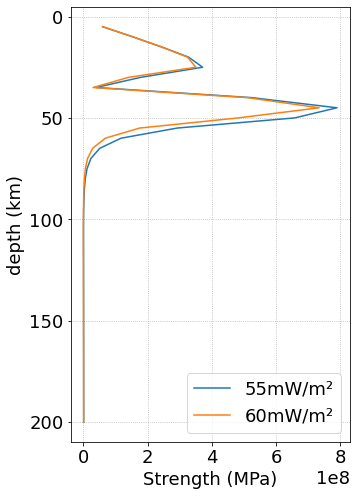

In [4]:
# recalcualte p1 p2
# https://www.continuummechanics.org/principalstress.html
#https://lambdageeks.com/principal-stress-example/
    
df['p1_b'] = 0.5*(df['xx'] + df['yy']) + np.sqrt((0.5*(df['xx'] - df['yy']))**2 +df['xy']**2)
df['p2_b'] = 0.5*(df['xx'] + df['yy']) - np.sqrt((0.5*(df['xx'] - df['yy']))**2 +df['xy']**2)
df['p1_b_h'] = 0.5*(df['xx_h'] + df['yy_h']) + np.sqrt((0.5*(df['xx_h'] - df['yy_h']))**2 +df['xy_h']**2)
df['p2_b_h'] = 0.5*(df['xx_h'] + df['yy_h']) - np.sqrt((0.5*(df['xx_h'] - df['yy_h']))**2 +df['xy_h']**2)

df = df.iloc[::3, :]
fig,ax = plt.subplots(figsize=(5,8))
plt.plot( df['p1_b'] - df['p2_b'], df['y'],  label = '55mW/m\u00b2')
plt.plot( df['p1_b_h'] - df['p2_b_h'], df['y'],  label = '60mW/m\u00b2')
#plt.plot( df['h_T'], df['y'], c= 'green', label = '60mW/m\u00b2')

plt.legend()
plt.grid(linestyle='dotted')
plt.xlabel('Strength (MPa)')
plt.ylabel('depth (km)')

ax.set_yticks([0, 50000, 100000, 150000, 200000])
ax.set_yticklabels([200, 150,100, 50, 0 ])